# **Hotel Reservations Dataset**

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

# **Importing Required Libraries for Execution**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import warnings

# **Loading the dataset**

In [ ]:
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# **Analysis Of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
df['lead_time'].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

In [ ]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

# **Analysis data through visuals**

<Axes: >

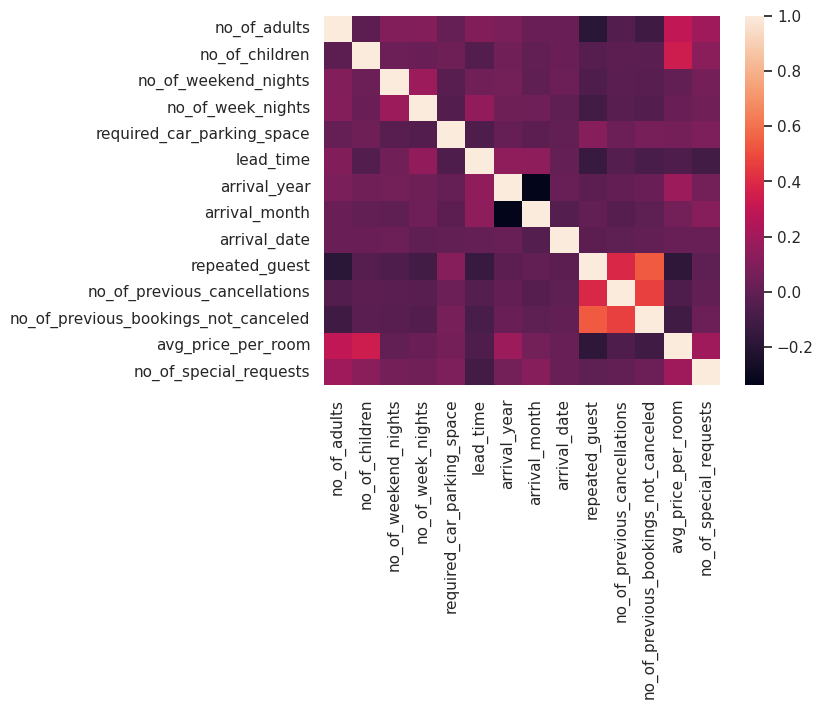

In [ ]:
sns.heatmap(df.corr())

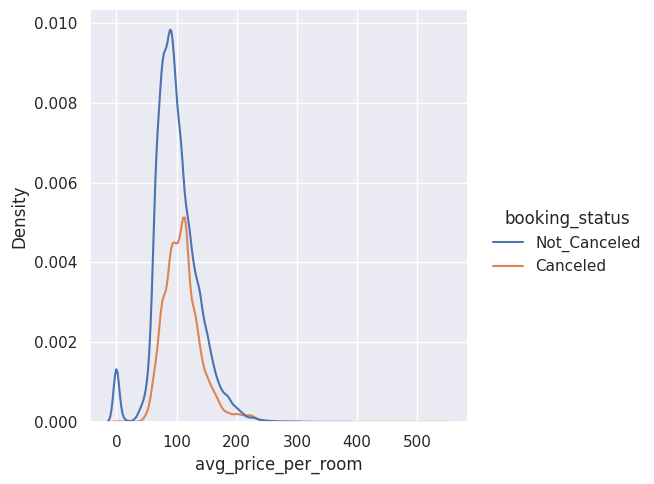

In [ ]:
sns.displot(df,x="avg_price_per_room",hue="booking_status",kind='kde')

<Axes: xlabel='no_of_week_nights', ylabel='count'>

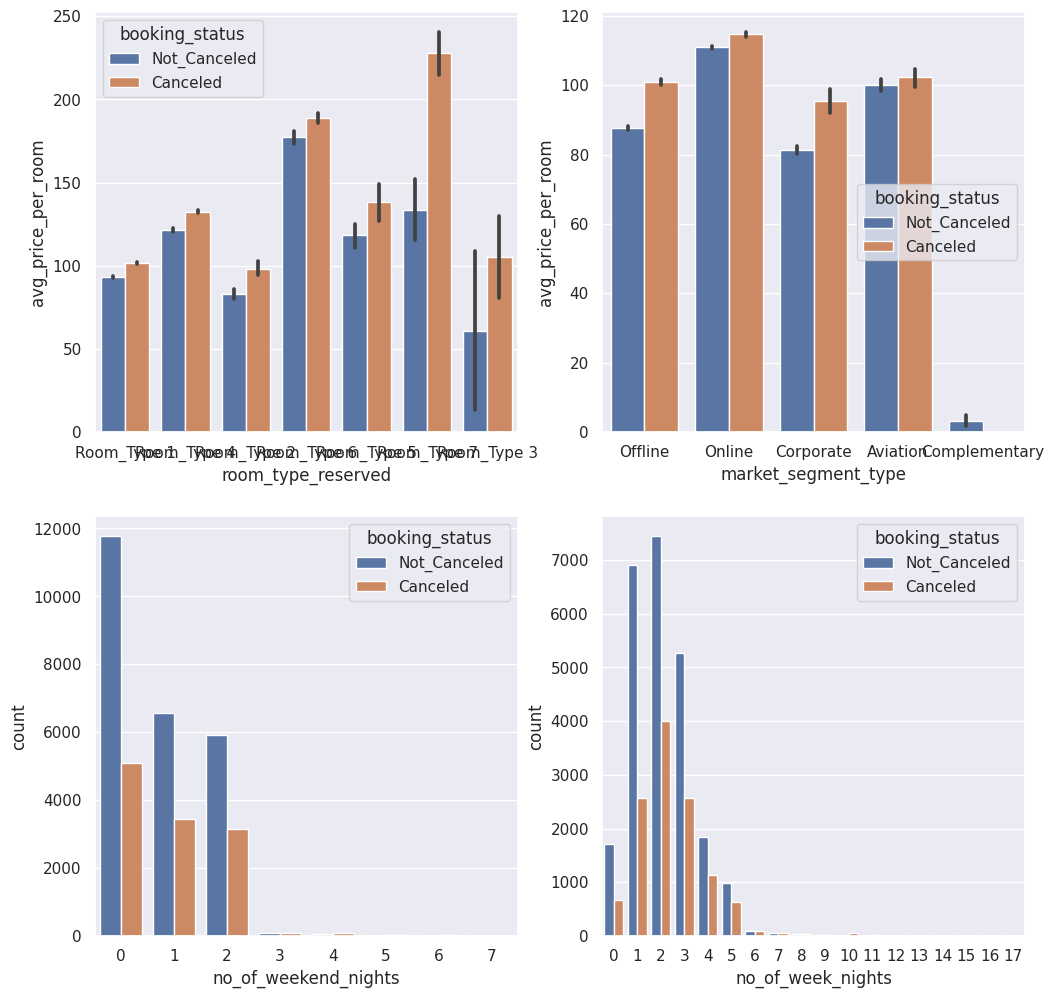

In [ ]:
fig,axis=plt.subplots(2,2,figsize=(12,12))
sns.barplot(data=df,x='room_type_reserved',y='avg_price_per_room',hue='booking_status',ax=axis[0,0])
sns.barplot(data=df,x='market_segment_type',y='avg_price_per_room',hue='booking_status',ax=axis[0,1])
sns.countplot(data=df,x='no_of_weekend_nights',hue='booking_status',ax=axis[1,0])
sns.countplot(data=df,x='no_of_week_nights',hue='booking_status',ax=axis[1,1])

# **Data Cleaning and Data Processing**

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
le=LabelEncoder()
lst=['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

**Droping the unwanted Features**

In [ ]:
df.drop(labels=['Booking_ID'],axis=1,inplace=True)

# **Checking the dataset is Balance or Not**

1    24390
0    11885
Name: booking_status, dtype: int64


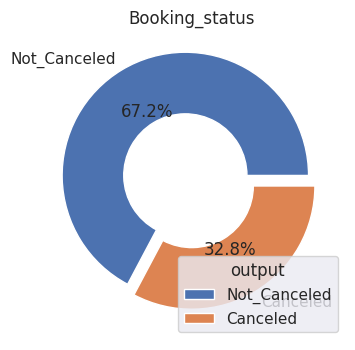

In [ ]:
h=df['booking_status'].value_counts()
print(h)
new=['Not_Canceled','Canceled']
plt.figure(figsize=(4,4))
plt.pie(h,explode=[0.1,0],labels=new,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Booking_status')
plt.legend(title='output')
plt.show()

# **Seperating dataset input as X and output as Y**

In [ ]:
X=df.iloc[:,1:-1]
X

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1
36271,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2
36272,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2
36273,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0


In [ ]:
Y=df.iloc[:,-1]
Y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

# **Scaling the Features**

In [ ]:
sc=StandardScaler()
X_new=sc.fit_transform(X)
X_new

array([[-0.26147045,  0.2174012 , -0.14480303, ..., -0.08745646,
        -1.09503276, -0.78813999],
       [-0.26147045,  1.36599262,  0.56397175, ..., -0.08745646,
         0.09280591,  0.48376045],
       [-0.26147045,  1.36599262, -0.85357781, ..., -0.08745646,
        -1.2375278 , -0.78813999],
       ...,
       [-0.26147045,  1.36599262,  2.69029611, ..., -0.08745646,
        -0.14345087,  1.75566089],
       [-0.26147045, -0.93119021,  0.56397175, ..., -0.08745646,
        -0.25431201, -0.78813999],
       [-0.26147045,  0.2174012 , -0.14480303, ..., -0.08745646,
         1.65996637, -0.78813999]])

**Splitting the dataset into training and test sets**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=1)

# **Model Creation**



*   **KNN**
*   **SVM**

*   **Naive Bayes**
*   **Random Forest**

*   **DecisionTree**







In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=1)
dtc=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dtc]
score=[]
for model in lst:
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print('Accuracy_score of',model,':')
  model_score=accuracy_score(Y_test,Y_pred)*100
  print(model_score) 
  score.append(model_score)
  print('****************************************')

Accuracy_score of KNeighborsClassifier() :
85.62896260222365
****************************************
Accuracy_score of SVC() :
83.32261325002297
****************************************
Accuracy_score of GaussianNB() :
42.10236148120923
****************************************
Accuracy_score of RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=1) :
90.07626573555086
****************************************
Accuracy_score of DecisionTreeClassifier(criterion='entropy') :
87.27372967012772
****************************************


**DataFrame Of Accuracy of Each model**

In [ ]:
Algorithm=['Knn','Svm','Naive','Random Forest','Decision Tree']
Accuracy=score
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5])
Data.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,Knn,85.628963
2,Svm,83.322613
3,Naive,42.102361
4,Random Forest,90.076266
5,Decision Tree,87.273730


# **ImBalanced dataset handling using SMOTTEENN**

In [ ]:
us=SMOTEENN(random_state=1)
X_us,Y_us=us.fit_resample(X_new,Y)
X_us,Y_us

(array([[-0.26147045,  1.36599262, -0.85357781, ..., -0.08745646,
         -1.2375278 , -0.78813999],
        [-0.26147045, -0.93119021, -0.14480303, ..., -0.08745646,
         -0.09756747, -0.78813999],
        [-0.26147045, -0.93119021, -0.14480303, ..., -0.08745646,
          0.32991765,  0.48376045],
        ...,
        [-0.26147045, -0.93119021,  0.56397175, ..., -0.08745646,
          0.78590179,  1.75566089],
        [-0.26147045,  1.36599262, -1.5623526 , ..., -0.08745646,
          1.14213939,  0.48376045],
        [-0.26147045,  0.2174012 , -0.14480303, ..., -0.08745646,
          1.65996637, -0.78813999]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 37649    1
 37650    1
 37651    1
 37652    1
 37653    1
 Name: booking_status, Length: 37654, dtype: int64)

0    19772
1    17882
Name: booking_status, dtype: int64


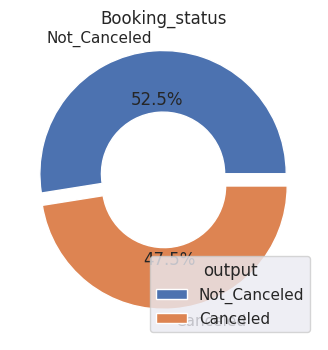

In [ ]:
h1=Y_us.value_counts()
print(h1)
new=['Not_Canceled','Canceled']
plt.figure(figsize=(4,4))
plt.pie(h1,explode=[0.1,0],labels=new,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Booking_status')
plt.legend(title='output')
plt.show()

In [ ]:
X_trainus,X_testus,Y_trainus,Y_testus=train_test_split(X_us,Y_us,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=1)
dtc=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dtc]
score1=[]
for model in lst:
  model.fit(X_trainus,Y_trainus)
  Y_predus=model.predict(X_testus)
  print('Accuracy_score of',model,':')
  model_score=accuracy_score(Y_testus,Y_predus)*100
  print(model_score) 
  score1.append(model_score)
  print('****************************************')

Accuracy_score of KNeighborsClassifier() :
96.7956094538373
****************************************
Accuracy_score of SVC() :
90.16553067185978
****************************************
Accuracy_score of GaussianNB() :
57.92688324333894
****************************************
Accuracy_score of RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=1) :
97.95520934761441
****************************************
Accuracy_score of DecisionTreeClassifier(criterion='entropy') :
96.25564309108613
****************************************


In [ ]:
Algorithm=['Knn','Svm','Naive','Random Forest','Decision Tree']
Accuracy=score1
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,Knn,96.795609
2,Svm,90.165531
3,Naive,57.926883
4,Random Forest,97.955209
5,Decision Tree,96.255643


# **Principal Component Analysis (PCA)**

In [ ]:
pca=PCA(n_components=13)
X_trainpca=pca.fit_transform(X_train)
X_testpca=pca.transform(X_test)
X_trainpca

array([[ 0.58362144, -0.67749552, -0.4706115 , ..., -0.36278637,
        -0.21789475, -0.44012511],
       [-0.27303216, -0.0524916 ,  1.21752721, ...,  0.25105779,
         0.6528888 ,  0.4005671 ],
       [ 0.20513216, -1.21732298, -0.11452398, ...,  0.63524924,
         0.12756853,  0.58256463],
       ...,
       [-0.20214961, -0.14331239,  0.56705085, ..., -0.75295266,
         0.15883547, -0.99813092],
       [-3.22268239,  3.67730986, -0.24462483, ...,  1.06198435,
         0.78733044,  0.10338049],
       [-0.33816823, -0.55150395,  0.38714838, ...,  0.13257725,
         0.49024338, -0.21873223]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=1)
dtc=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dtc]
score2=[]
for model in lst:
  model.fit(X_trainpca,Y_train)
  Y_predpca=model.predict(X_testpca)
  print('Accuracy_score of',model,':')
  model_score=accuracy_score(Y_test,Y_predpca)*100
  print(model_score) 
  score2.append(model_score)
  print('****************************************')

Accuracy_score of KNeighborsClassifier() :
85.27979417440044
****************************************
Accuracy_score of SVC() :
82.89993567950013
****************************************
Accuracy_score of GaussianNB() :
70.65147477717542
****************************************
Accuracy_score of RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=1) :
87.08995681337866
****************************************
Accuracy_score of DecisionTreeClassifier(criterion='entropy') :
83.34099053569788
****************************************


In [ ]:
Algorithm=['Knn','Svm','Naive','Random Forest','Decision Tree']
Accuracy=score2
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,Knn,85.279794
2,Svm,82.899936
3,Naive,70.651475
4,Random Forest,87.089957
5,Decision Tree,83.340991


# **Detecting Outliers**

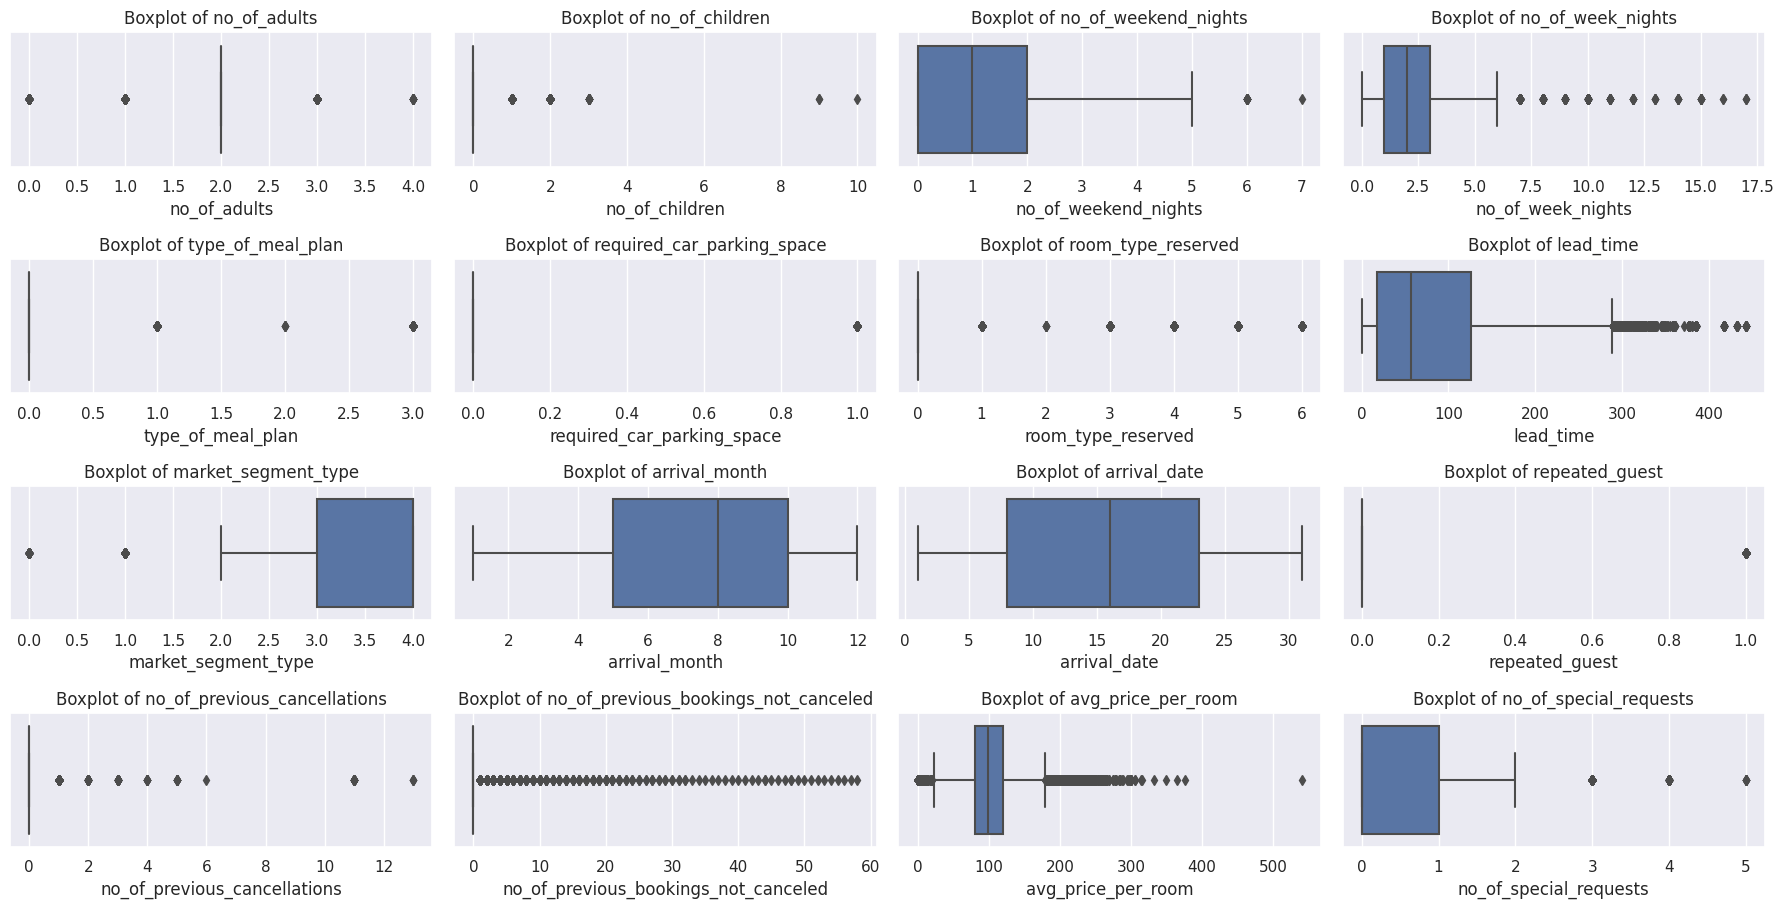

In [ ]:
features= ['no_of_adults','no_of_children','no_of_weekend_nights',
       'no_of_week_nights','type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','lead_time','market_segment_type','arrival_month',
       'arrival_date','repeated_guest','no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

plt.figure(figsize=(18,11))
for i,j in zip(range(1, 18),features):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df,x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

**So , we got outliers in No_of_adults,No_of_children,No_of_weekend_nights, 
No_of_week_nights,Type_of_meal_plan,Required_car_parking_space, Room_type_reserved,Lead_time,Market_segment_type,Arrival_year,Repeated_guest,No_of_previous_cancellations,
No_of_previous_bookings_not_canceled,Avg_price_per_room,No_of_special_requests.**

# **Capping of outliers**

In [ ]:
df1 = df.copy()
def remove_outliers_IQR(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

**Detecting lower and upper limit of each features that have outliers**

In [ ]:
remove_outliers_IQR('no_of_adults')

Upper limit 2.0
Lower limit 2.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_children')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_weekend_nights')

Upper limit 5.0
Lower limit -3.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_week_nights')

Upper limit 6.0
Lower limit -2.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('type_of_meal_plan')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('required_car_parking_space')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('room_type_reserved')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('lead_time')

Upper limit 289.5
Lower limit -146.5


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('market_segment_type')

Upper limit 5.5
Lower limit 1.5


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('repeated_guest')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_previous_cancellations')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_previous_bookings_not_canceled')

Upper limit 0.0
Lower limit 0.0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('avg_price_per_room')

Upper limit 179.55
Lower limit 20.749999999999993


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
remove_outliers_IQR('no_of_special_requests')

Upper limit 2.5
Lower limit -1.5


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


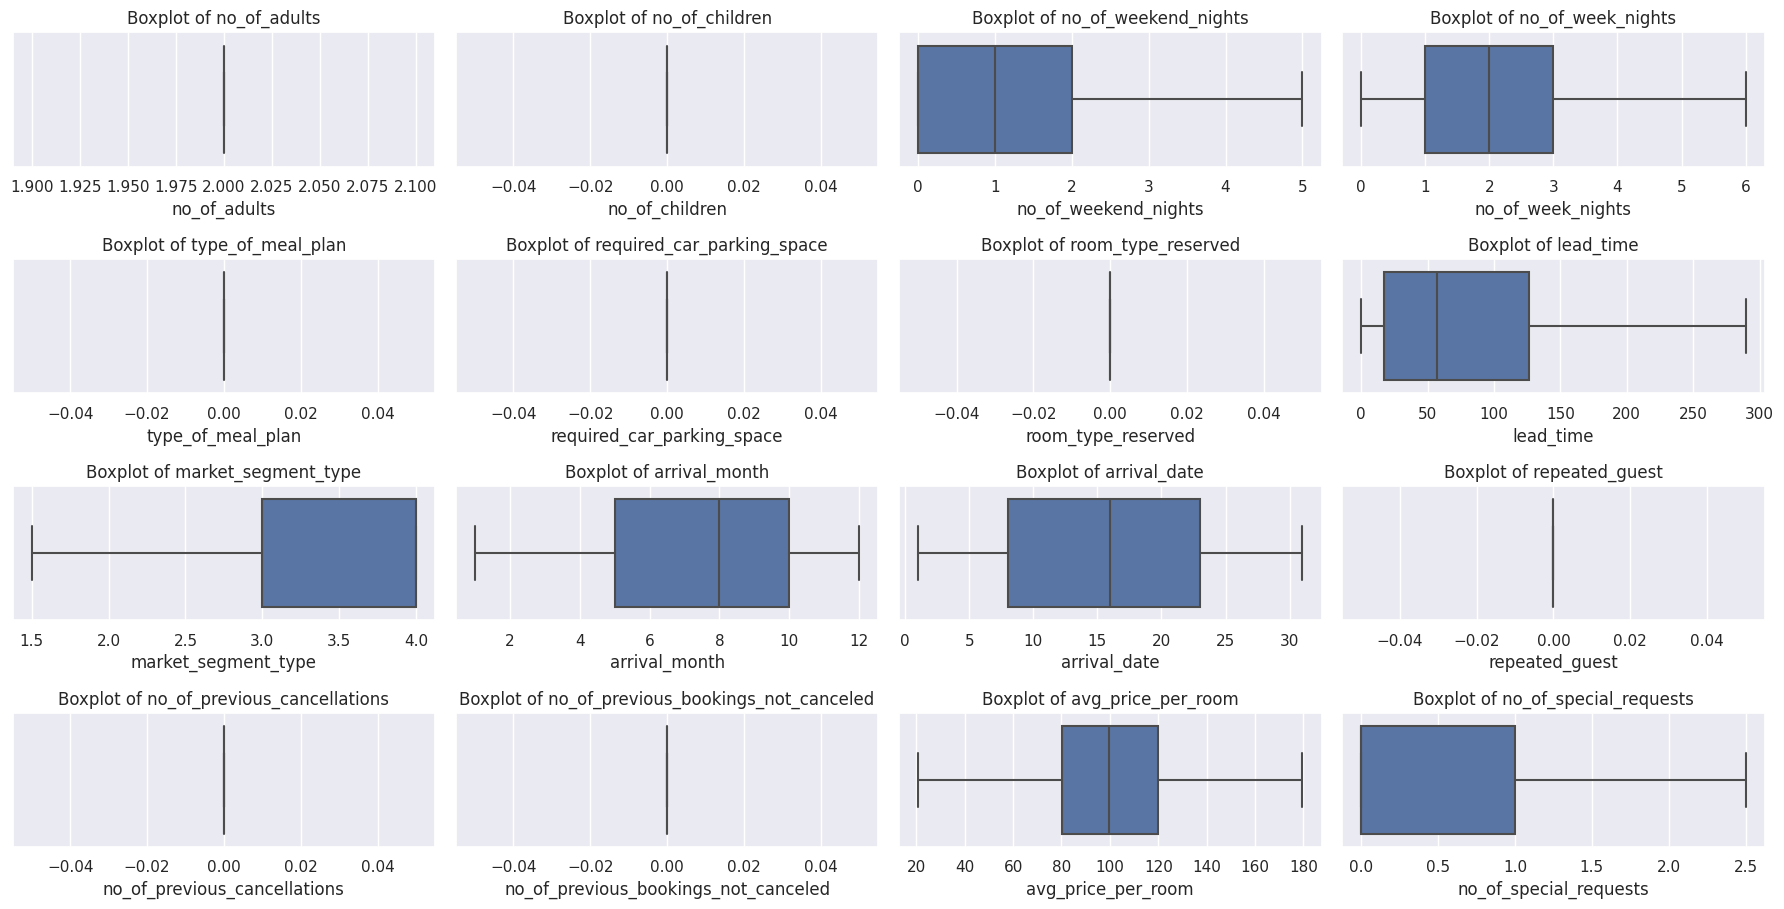

In [ ]:
features= ['no_of_adults','no_of_children','no_of_weekend_nights',
       'no_of_week_nights','type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','lead_time','market_segment_type','arrival_month',
       'arrival_date','repeated_guest','no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

plt.figure(figsize=(18,11))
for i,j in zip(range(1, 18),features):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df1,x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

In [ ]:
X=df1.drop(columns=['booking_status'])
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,224.0,2017,10,2,3.0,0.0,0.0,0.0,65.00,0.0
1,2.0,0.0,2.0,3.0,0.0,0.0,0.0,5.0,2018,11,6,4.0,0.0,0.0,0.0,106.68,1.0
2,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2018,2,28,4.0,0.0,0.0,0.0,60.00,0.0
3,2.0,0.0,0.0,2.0,0.0,0.0,0.0,211.0,2018,5,20,4.0,0.0,0.0,0.0,100.00,0.0
4,2.0,0.0,1.0,1.0,0.0,0.0,0.0,48.0,2018,4,11,4.0,0.0,0.0,0.0,94.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.0,0.0,2.0,6.0,0.0,0.0,0.0,85.0,2018,8,3,4.0,0.0,0.0,0.0,167.80,1.0
36271,2.0,0.0,1.0,3.0,0.0,0.0,0.0,228.0,2018,10,17,4.0,0.0,0.0,0.0,90.95,2.0
36272,2.0,0.0,2.0,6.0,0.0,0.0,0.0,148.0,2018,7,1,4.0,0.0,0.0,0.0,98.39,2.0
36273,2.0,0.0,0.0,3.0,0.0,0.0,0.0,63.0,2018,4,21,4.0,0.0,0.0,0.0,94.50,0.0


In [ ]:
Y=df1['booking_status']
Y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [ ]:
X_trainor,X_testor,Y_trainor,Y_testor=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
sc=StandardScaler()
X_trainor=sc.fit_transform(X_trainor)
X_testor=sc.transform(X_testor)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=1)
dtc=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dtc]
score3=[]
for model in lst:
  model.fit(X_trainor,Y_trainor)
  Y_predor=model.predict(X_testor)
  print('Accuracy_score of',model,':')
  model_score=accuracy_score(Y_testor,Y_predor)*100
  print(model_score) 
  score3.append(model_score)
  print('****************************************')

Accuracy_score of KNeighborsClassifier() :
85.55545345952403
****************************************
Accuracy_score of SVC() :
84.31498667646788
****************************************
Accuracy_score of GaussianNB() :
78.12184140402462
****************************************
Accuracy_score of RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=1) :
89.50656987962878
****************************************
Accuracy_score of DecisionTreeClassifier(criterion='entropy') :
87.27372967012772
****************************************


In [ ]:
Algorithm=['Knn','Svm','Naive','Random Forest','Decision Tree']
Accuracy=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,Knn,85.555453
2,Svm,84.314987
3,Naive,78.121841
4,Random Forest,89.506570
5,Decision Tree,87.273730


# **Comparing Accuracy**

In [ ]:
Algorithm=['Knn','Svm','Naive','Random Forest','Decision Tree']
Accuracy=score
Accuracy1=score1
Accuracy2=score2
Accuracy3=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Balancing':Accuracy1,'PCA':Accuracy2,'Outlier':Accuracy3},index=[1,2,3,4,5])
Data1.style.highlight_max(subset='Balancing',color='lightgreen')

,Algorithm,Accuracy,Balancing,PCA,Outlier
1,Knn,85.628963,96.795609,85.279794,85.555453
2,Svm,83.322613,90.165531,82.899936,84.314987
3,Naive,42.102361,57.926883,70.651475,78.121841
4,Random Forest,90.076266,97.955209,87.089957,89.506570
5,Decision Tree,87.273730,96.255643,83.340991,87.273730


**So,Here we develop a hotel reservation model using a variety of techniques, including KNN, SVM, Naive Bayes, Random Forest, and Decision Tree.Thus, after balancing the data, the random forest algorithm yields a high accuracy of 97.955209.**